# Example for plotting ERA data

In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys, glob, os 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from netCDF4 import Dataset   
import pyicon as pyic
import cartopy.crs as ccrs 

In [3]:
path_data = '/pool/data/ICON/post/QuickPlots_1x1/ERAin/' 
y1 = 1979
y2 = 2016
type = 'MM'
name = 'ERAinBil_1x1'

In [4]:
var = 'ta'
fname = f'{name}_{var}_{y1}-{y2}_{type}.nc'
f = Dataset(path_data+fname, 'r')
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
plev = f.variables['plev'][:]
ncv_time = f.variables['time']
time = pyic.nctime_to_datetime64(ncv_time, time_mode='num2date')
f.close()
lon[lon>180.] += -360.
iw = (lon>0).sum()+1
isort = np.arange(lon.size)
isort = np.concatenate((isort[iw:], isort[:iw]))
lon = lon[isort]

In [29]:
lon

masked_array(data=[-179., -178., -177., -176., -175., -174., -173., -172.,
                   -171., -170., -169., -168., -167., -166., -165., -164.,
                   -163., -162., -161., -160., -159., -158., -157., -156.,
                   -155., -154., -153., -152., -151., -150., -149., -148.,
                   -147., -146., -145., -144., -143., -142., -141., -140.,
                   -139., -138., -137., -136., -135., -134., -133., -132.,
                   -131., -130., -129., -128., -127., -126., -125., -124.,
                   -123., -122., -121., -120., -119., -118., -117., -116.,
                   -115., -114., -113., -112., -111., -110., -109., -108.,
                   -107., -106., -105., -104., -103., -102., -101., -100.,
                    -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,  -92.,
                    -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,
                    -83.,  -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,
                    -75.,

In [5]:
ipr = np.argmin((plev-500e2)**2)

In [6]:
def load_era3d_var(fpath, ta, isort):
    f = Dataset(path_data+fname, 'r')
    data = f.variables[var][:].mean(axis=0)
    f.close()
    data = data[:,:,isort]
    return data

In [7]:
var = 'ta'
fname = f'{name}_{var}_{y1}-{y2}_{type}.nc'
ta = load_era3d_var(path_data+fname, var, isort)

Global PlateCarree Plot:

Text(0.5, 1.0, 'temperature at 500hPa [$^o$C]')

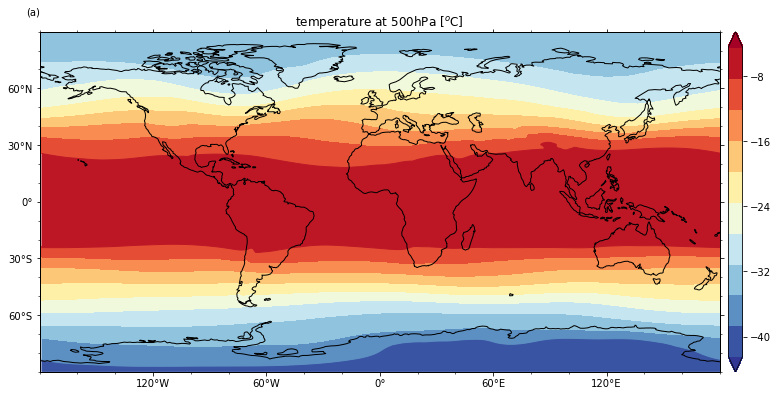

In [22]:
ccrs_proj = ccrs.PlateCarree()
#ccrs_proj = None
hca, hcb = pyic.arrange_axes(1,1, asp=0.5, projection=ccrs_proj, fig_size_fac=3, sharex=False)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, ta[ipr,:]-273.15, ax=ax, cax=cax, clim='auto', contfs='auto', projection=ccrs_proj, rasterized=True)
pyic.plot_settings(ax, template='global', land_facecolor='none')
ax.set_title('temperature at %.0fhPa [$^o$C]'%(plev[ipr]/100))

Text(0, 0.5, 'pressure [hPa]')

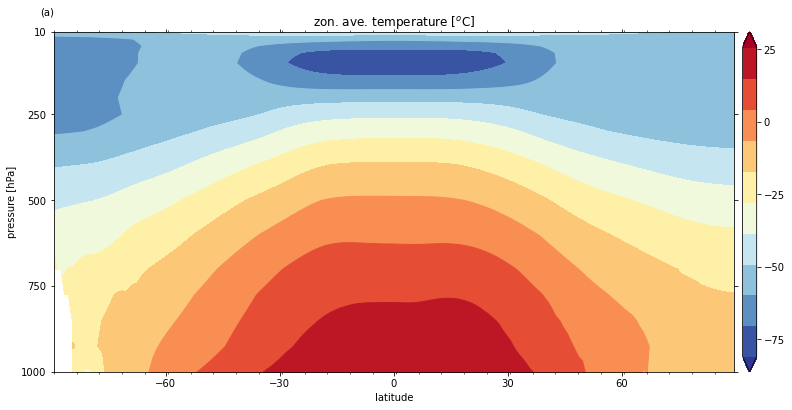

In [23]:
hca, hcb = pyic.arrange_axes(1,1, asp=0.5, fig_size_fac=3, sharex=False)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lat, plev/100., ta.mean(axis=2)-273.15, contfs='auto', ax=ax, cax=cax, clim='auto')
ax.set_ylim([1000,10])
pyic.plot_settings(ax, xticks=[-60,-30,0,30,60], yticks=[10., 250., 500., 750., 1000.])
ax.set_title('zon. ave. temperature [$^o$C]')
ax.set_xlabel('latitude')
ax.set_ylabel('pressure [hPa]')

North Polar Stereo Projection

Text(0.5, 1.0, 'temperature at 500hPa [$^o$C]')

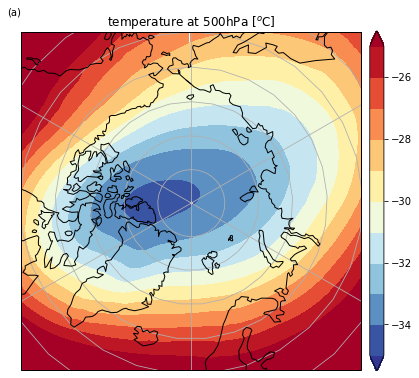

In [24]:
# --- NorthPolarStereo projection
ccrs_proj = ccrs.NorthPolarStereo()
hca, hcb = pyic.arrange_axes(1,1, asp=1.0, projection=ccrs_proj, fig_size_fac=3,
                             sharex=True, sharey=True)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, ta[ipr,:,:]-273.15, ax=ax, cax=cax, clim=[-35, -25], contfs='auto', projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, xlim=[-180,180], ylim=[60,90], do_xyticks=False, do_xyminorticks=False, do_gridlines=True, land_facecolor='none')
ax.set_title('temperature at %.0fhPa [$^o$C]'%(plev[ipr]/100))

North Polar Stereo Projection on original grid

Text(0.5, 1.0, 'meridional wind stress [N/m$^2$]')

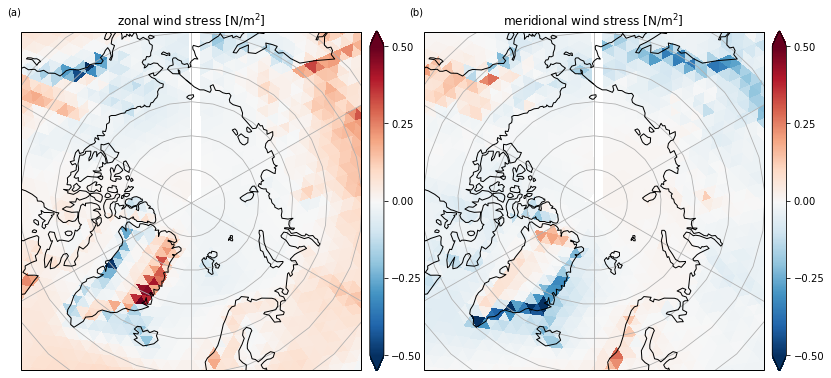

In [9]:
ccrs_proj = ccrs.NorthPolarStereo()
hca, hcb = pyic.arrange_axes(2,1, asp=1.0, projection=ccrs_proj, fig_size_fac=3,
                             sharex=True, sharey=True)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(IcD_atm2d.Tri, tauu, ax=ax, cax=cax, clim=0.5, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, xlim=[-180,180], ylim=[60,90], do_xyticks=False, do_xyminorticks=False, do_gridlines=True, land_facecolor='none')
ax.set_title('zonal wind stress [N/m$^2$]')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(IcD_atm2d.Tri, tauv, ax=ax, cax=cax, clim=0.5, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, xlim=[-180,180], ylim=[60,90], do_xyticks=False, do_xyminorticks=False, do_gridlines=True, land_facecolor='none')
ax.set_title('meridional wind stress [N/m$^2$]')